# APIs and JSON

In this notebook, we will learn how to use APIs and JSON in Python. We will use the `requests` library to make requests to an API and get data in JSON format. We will also learn how to parse JSON data and extract the information we need.

In [22]:
%pip install --quiet matplotlib pandas requests IPython


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## A quick guide to URLs in Python

Before we start, let's learn how to use URLs in Python. We can use the `urllib` module to parse URLs and get the different parts of the URL.

In [23]:
from urllib.parse import urlparse, parse_qs


url = "https://api.open-meteo.com/v1/forecast?latitude=51.5074&longitude=-0.1278&hourly=temperature_2m"

parsed = urlparse(url)

scheme = parsed.scheme
netloc = parsed.netloc
path = parsed.path
query = parse_qs(parsed.query)

print(f"URL Components of: {url}")
print(f"  Scheme: {scheme}")
print(f"  Network Location: {netloc}")
print(f"  Path: {path}")
print(f"  Query: {query}")

URL Components of: https://api.open-meteo.com/v1/forecast?latitude=51.5074&longitude=-0.1278&hourly=temperature_2m
  Scheme: https
  Network Location: api.open-meteo.com
  Path: /v1/forecast
  Query: {'latitude': ['51.5074'], 'longitude': ['-0.1278'], 'hourly': ['temperature_2m']}


We can do the reverse as well, we can create a URL from its parts using the `urlunparse` function. This function takes a tuple of URL components and returns a valid URL. We need to convert query parameters into a string before passing them to the function, and we can use the `urlencode` function to do that.

In [24]:
from urllib.parse import urlencode, urlunparse


query_params = {
	"latitude": 51.5074,
	"longitude": -0.1278,
	"hourly": "temperature_2m"
}

query_string = urlencode(query_params)

new_url = urlunparse(('https', 'api.open-meteo.com', 'v1/forecast', '', query_string, ''))
print(new_url)


https://api.open-meteo.com/v1/forecast?latitude=51.5074&longitude=-0.1278&hourly=temperature_2m


## A quick guide to HTTP requests in Python

HyperText Transfer Protocol (HTTP) is the protocol used to transfer data over the web. We can use the `requests` library to make HTTP requests in Python. The `requests` library is a simple and easy-to-use library that allows us to send HTTP requests and get responses.

The client (our code) sends a request to the server (the API) and the server responds with a response. The request and response are both made up of headers and a body. 

Here’s an example of how to use the `requests` library to send a GET request:


In [25]:
import requests

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 51.5074,
    "longitude": -0.1278,
    "hourly": "temperature_2m"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    body = response.text
    print(body)
else:
    print(f"Error: {response.status_code}")


{"latitude":51.5,"longitude":-0.120000124,"generationtime_ms":0.03516674041748047,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":16.0,"hourly_units":{"time":"iso8601","temperature_2m":"°C"},"hourly":{"time":["2025-02-27T00:00","2025-02-27T01:00","2025-02-27T02:00","2025-02-27T03:00","2025-02-27T04:00","2025-02-27T05:00","2025-02-27T06:00","2025-02-27T07:00","2025-02-27T08:00","2025-02-27T09:00","2025-02-27T10:00","2025-02-27T11:00","2025-02-27T12:00","2025-02-27T13:00","2025-02-27T14:00","2025-02-27T15:00","2025-02-27T16:00","2025-02-27T17:00","2025-02-27T18:00","2025-02-27T19:00","2025-02-27T20:00","2025-02-27T21:00","2025-02-27T22:00","2025-02-27T23:00","2025-02-28T00:00","2025-02-28T01:00","2025-02-28T02:00","2025-02-28T03:00","2025-02-28T04:00","2025-02-28T05:00","2025-02-28T06:00","2025-02-28T07:00","2025-02-28T08:00","2025-02-28T09:00","2025-02-28T10:00","2025-02-28T11:00","2025-02-28T12:00","2025-02-28T13:00","2025-02-28T14:00","2025-02-28T15:0

We can visualise this process using a UML sequence diagram:

```mermaid
sequenceDiagram
    participant Client
    participant Server

    Client->>Server: GET /v1/forecast?latitude=51.5074&longitude=-0.1278&hourly=temperature_2m HTTP/1.1
    Note right of Client: Request headers & parameters

    Server->>Client: HTTP/1.1 200 OK
    Note left of Server: Response headers & body
```

## Side (re)Quest - Debugging HTTP

I want to show you how to add hooks to the `requests` library to debug the requests and responses. We can use add a response hook (a function that will get called when a response is made) to log the request and response.

First, some utility function to print the request and response.

In [26]:
from requests import Request, Response, Session


def print_request(request: Request):
    """
    Print the details of an HTTP request.

    :param request: The request object.
    """
    url = urlparse(request.url)

    # Combine the path and query string (if present)
    uri = "?".join([url.path, url.query]) if url.query else url.path

    print(f"\n--> HTTP Request to {url.netloc}")
    print(f"REQUEST: {request.method} {uri}")
    print(f"HEADERS:")

    for key, value in request.headers.items():
        print(f"  {key}: {value}")

    if request.body:
        print(f"BODY: {request.body[:100]}..." if len(
            request.body) > 100 else f"BODY: {request.body}")


def print_response(response: Response):
    """
    Print the details of an HTTP response.

    :param response: The response object.
    """
    url = urlparse(response.url)

    print(f"\n<-- HTTP Response from {url.netloc}")
    print(f"RESPONSE: {response.status_code} {response.reason}")
    print(f"HEADERS:")

    for key, value in response.headers.items():
        print(f"  {key}: {value}")

    if response.text:
        print(f"BODY: {response.text[:100]}..." if len(
            response.text) > 100 else f"BODY: {response.body}")

This is the hook function that will be called when a response is made. It will call our help functions to print the request and response.

In [27]:
def http_logger(response, *args, **kwargs):
    """
    Log the details of an HTTP request and response.

    :param response: The response object.
    """
    print_request(response.request)
    print_response(response)

# Create a session to track request/response details
session = Session()

# Register the hook to log the details of each response

session.hooks["response"] = [http_logger]

Now, when we make a request using the session object, the details of the request and response will be printed to the console.

In [32]:
response = session.get(url, params=params)


--> HTTP Request to api.open-meteo.com
REQUEST: GET /v1/forecast?latitude=51.5074&longitude=-0.1278&hourly=temperature_2m
HEADERS:
  User-Agent: python-requests/2.32.3
  Accept-Encoding: gzip, deflate
  Accept: */*
  Connection: keep-alive

<-- HTTP Response from api.open-meteo.com
RESPONSE: 200 OK
HEADERS:
  Date: Thu, 27 Feb 2025 08:08:53 GMT
  Content-Type: application/json; charset=utf-8
  Transfer-Encoding: chunked
  Connection: keep-alive
  Content-Encoding: deflate
BODY: {"latitude":51.5,"longitude":-0.120000124,"generationtime_ms":0.04124641418457031,"utc_offset_second...


In [33]:
response.ok

True

In [34]:
response.text

'{"latitude":51.5,"longitude":-0.120000124,"generationtime_ms":0.04124641418457031,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":16.0,"hourly_units":{"time":"iso8601","temperature_2m":"°C"},"hourly":{"time":["2025-02-27T00:00","2025-02-27T01:00","2025-02-27T02:00","2025-02-27T03:00","2025-02-27T04:00","2025-02-27T05:00","2025-02-27T06:00","2025-02-27T07:00","2025-02-27T08:00","2025-02-27T09:00","2025-02-27T10:00","2025-02-27T11:00","2025-02-27T12:00","2025-02-27T13:00","2025-02-27T14:00","2025-02-27T15:00","2025-02-27T16:00","2025-02-27T17:00","2025-02-27T18:00","2025-02-27T19:00","2025-02-27T20:00","2025-02-27T21:00","2025-02-27T22:00","2025-02-27T23:00","2025-02-28T00:00","2025-02-28T01:00","2025-02-28T02:00","2025-02-28T03:00","2025-02-28T04:00","2025-02-28T05:00","2025-02-28T06:00","2025-02-28T07:00","2025-02-28T08:00","2025-02-28T09:00","2025-02-28T10:00","2025-02-28T11:00","2025-02-28T12:00","2025-02-28T13:00","2025-02-28T14:00","2025-02-28T15:

In [35]:
data = response.json()
data

{'latitude': 51.5,
 'longitude': -0.120000124,
 'generationtime_ms': 0.04124641418457031,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 16.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-02-27T00:00',
   '2025-02-27T01:00',
   '2025-02-27T02:00',
   '2025-02-27T03:00',
   '2025-02-27T04:00',
   '2025-02-27T05:00',
   '2025-02-27T06:00',
   '2025-02-27T07:00',
   '2025-02-27T08:00',
   '2025-02-27T09:00',
   '2025-02-27T10:00',
   '2025-02-27T11:00',
   '2025-02-27T12:00',
   '2025-02-27T13:00',
   '2025-02-27T14:00',
   '2025-02-27T15:00',
   '2025-02-27T16:00',
   '2025-02-27T17:00',
   '2025-02-27T18:00',
   '2025-02-27T19:00',
   '2025-02-27T20:00',
   '2025-02-27T21:00',
   '2025-02-27T22:00',
   '2025-02-27T23:00',
   '2025-02-28T00:00',
   '2025-02-28T01:00',
   '2025-02-28T02:00',
   '2025-02-28T03:00',
   '2025-02-28T04:00',
   '2025-02-28T05:00',
   '2025-02-28T06:00',
   '2025-02-28T07:

In [36]:
import pandas as pd


df = pd.DataFrame()
df["time"] = pd.to_datetime(data["hourly"]["time"])
df["temperature"] = data["hourly"]["temperature_2m"]

df.head()

,time,temperature
0,2025-02-27 00:00:00,4.9
1,2025-02-27 01:00:00,4.6
2,2025-02-27 02:00:00,4.8
3,2025-02-27 03:00:00,4.8
4,2025-02-27 04:00:00,4.7


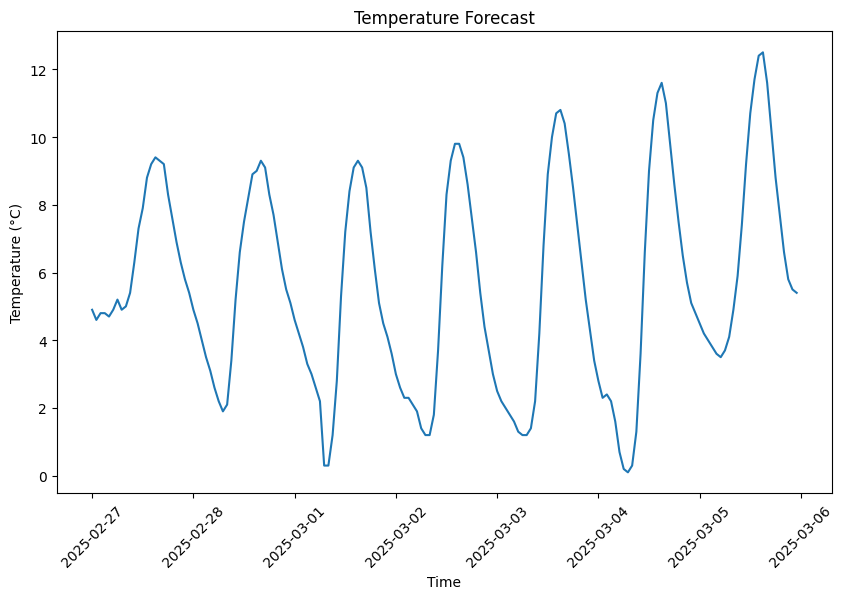

In [37]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["temperature"])
plt.title("Temperature Forecast")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


In [38]:
import json


json.dumps(data, indent=2)

'{\n  "latitude": 51.5,\n  "longitude": -0.120000124,\n  "generationtime_ms": 0.04124641418457031,\n  "utc_offset_seconds": 0,\n  "timezone": "GMT",\n  "timezone_abbreviation": "GMT",\n  "elevation": 16.0,\n  "hourly_units": {\n    "time": "iso8601",\n    "temperature_2m": "\\u00b0C"\n  },\n  "hourly": {\n    "time": [\n      "2025-02-27T00:00",\n      "2025-02-27T01:00",\n      "2025-02-27T02:00",\n      "2025-02-27T03:00",\n      "2025-02-27T04:00",\n      "2025-02-27T05:00",\n      "2025-02-27T06:00",\n      "2025-02-27T07:00",\n      "2025-02-27T08:00",\n      "2025-02-27T09:00",\n      "2025-02-27T10:00",\n      "2025-02-27T11:00",\n      "2025-02-27T12:00",\n      "2025-02-27T13:00",\n      "2025-02-27T14:00",\n      "2025-02-27T15:00",\n      "2025-02-27T16:00",\n      "2025-02-27T17:00",\n      "2025-02-27T18:00",\n      "2025-02-27T19:00",\n      "2025-02-27T20:00",\n      "2025-02-27T21:00",\n      "2025-02-27T22:00",\n      "2025-02-27T23:00",\n      "2025-02-28T00:00",\n   

In [39]:
with open("forecast.json", "w") as file:
    json.dump(data, file, indent=2)

In [40]:
data = None
data

In [41]:
with open("forecast.json", "r") as file:
    data = json.load(file)

In [42]:
data

{'latitude': 51.5,
 'longitude': -0.120000124,
 'generationtime_ms': 0.04124641418457031,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 16.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-02-27T00:00',
   '2025-02-27T01:00',
   '2025-02-27T02:00',
   '2025-02-27T03:00',
   '2025-02-27T04:00',
   '2025-02-27T05:00',
   '2025-02-27T06:00',
   '2025-02-27T07:00',
   '2025-02-27T08:00',
   '2025-02-27T09:00',
   '2025-02-27T10:00',
   '2025-02-27T11:00',
   '2025-02-27T12:00',
   '2025-02-27T13:00',
   '2025-02-27T14:00',
   '2025-02-27T15:00',
   '2025-02-27T16:00',
   '2025-02-27T17:00',
   '2025-02-27T18:00',
   '2025-02-27T19:00',
   '2025-02-27T20:00',
   '2025-02-27T21:00',
   '2025-02-27T22:00',
   '2025-02-27T23:00',
   '2025-02-28T00:00',
   '2025-02-28T01:00',
   '2025-02-28T02:00',
   '2025-02-28T03:00',
   '2025-02-28T04:00',
   '2025-02-28T05:00',
   '2025-02-28T06:00',
   '2025-02-28T07: